In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset, concatenate_datasets
from itertools import combinations, product
from huggingface_hub import login as hf_login
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
ds = load_dataset("beanham/spatial_join_dataset")
train=ds['train']
positive=train.filter(lambda x: x['label']==1)
negative=train.filter(lambda x: x['label']==0)
train_pd=train.to_pandas()

## Angle Degrees

In [3]:
name='min_angle'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 0.9224326076008726
Mean: 24.358718314319734
Max: 89.98805846135882
STD: 34.120410293675114


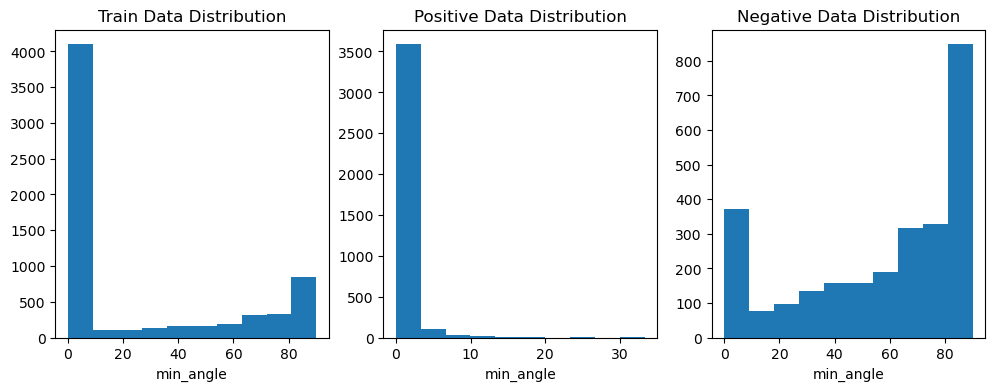

In [4]:
## almost all positive cases have small angles (<10 degrees)
## most negative cases have large angles, with some cases having small angles
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.hist(train[name])
plt.title('Train Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 2)
plt.hist(positive[name])
plt.title('Positive Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 3)
plt.hist(negative[name])
plt.title('Negative Data Distribution')
plt.xlabel(name)
pass

## put positive & negative together

We observe that:
- The distribution supports that most positive pairs have small angle degrees. While most negative pairs have larger degrees, a few of them do have small angle degrees as well, making the heuristic predictions false positive.

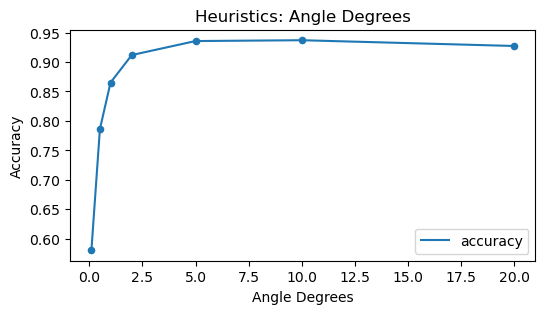

In [17]:
metrics=[0.1,0.5,1,2,5,10,20]
train_gt=np.array(train['label'])
accuracy=[]
for m in metrics:
    pred=np.array(train['min_angle'])<=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=20)
plt.title('Heuristics: Angle Degrees')
plt.ylabel('Accuracy')
plt.xlabel('Angle Degrees')
plt.legend()
pass    

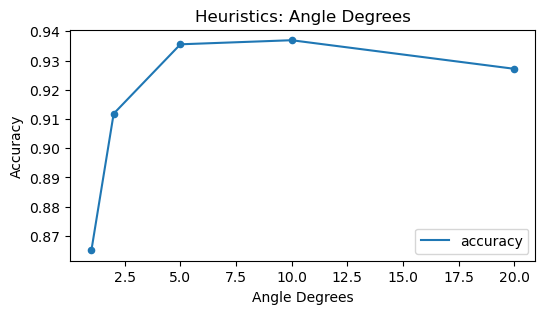

In [16]:
# final degrees: [1,2,5,10,20]
metrics=[1,2,5,10,20]
train_gt=np.array(train['label'])
accuracy=[]
for m in metrics:
    pred=np.array(train['min_angle'])<=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=20)
plt.title('Heuristics: Angle Degrees')
plt.ylabel('Accuracy')
plt.xlabel('Angle Degrees')
plt.legend()
pass    

In [18]:
degrees=[0.1,1,2,5,10,20]
for d in degrees:
    positive_metric=positive.filter(lambda x: x['min_angle']<=d)
    negative_metric=negative.filter(lambda x: x['min_angle']>d)
    print('----------------------------------------')
    print(f'Degree: {d}...')
    print(f'Total Samples: {len(positive_metric)+len(negative_metric)}')
    print(f'Positive Proportion: {len(positive_metric)/len(positive)}')
    print(f'Negative Proportion: {len(negative_metric)/len(negative)}')

----------------------------------------
Degree: 0.1...
Total Samples: 3740
Positive Proportion: 0.2953216374269006
Negative Proportion: 0.9809701492537314
----------------------------------------
Degree: 1...
Total Samples: 5573
Positive Proportion: 0.8216374269005848
Negative Proportion: 0.9261194029850747
----------------------------------------
Degree: 2...
Total Samples: 5874
Positive Proportion: 0.916267942583732
Negative Proportion: 0.9055970149253731
----------------------------------------
Degree: 5...
Total Samples: 6027
Positive Proportion: 0.9731525784157363
Negative Proportion: 0.8828358208955224
----------------------------------------
Degree: 10...
Total Samples: 6036
Positive Proportion: 0.9920255183413078
Negative Proportion: 0.8597014925373134
----------------------------------------
Degree: 20...
Total Samples: 5973
Positive Proportion: 0.998936735778841
Negative Proportion: 0.8264925373134329


---

## Euclidean Distance

In [21]:
name='euc_dist'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 6.884390860713215
Mean: 5.5110303100771985
Max: 9.997677095262258
STD: 3.606794913883234


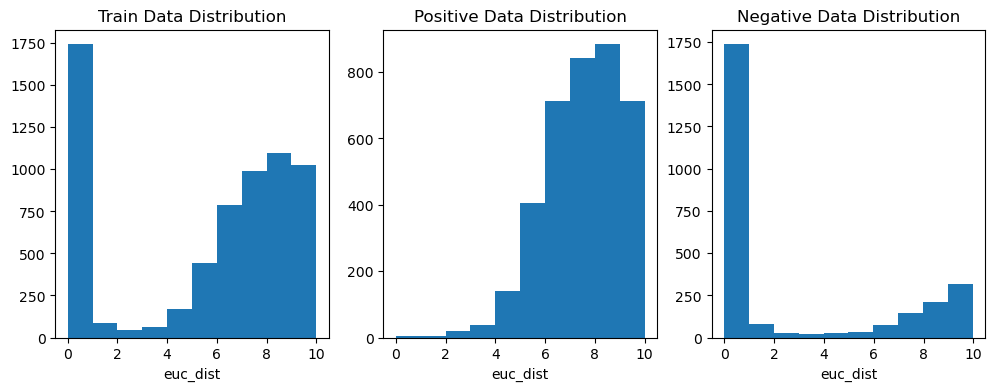

In [23]:
## almost all positive cases have larger distances
## most negative cases have smaller distances, with a few having large distances
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.hist(train[name])
plt.title('Train Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 2)
plt.hist(positive[name])
plt.title('Positive Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 3)
plt.hist(negative[name])
plt.title('Negative Data Distribution')
plt.xlabel(name)
pass

### a two feature model for the classification problem.
    - logistic regression

## inspect the pairs with dist=10

We observe that:
- The distribution supports that most positive pairs have larger distances. While most negative pairs have smaller distance degrees, a few of them do have larger distances.

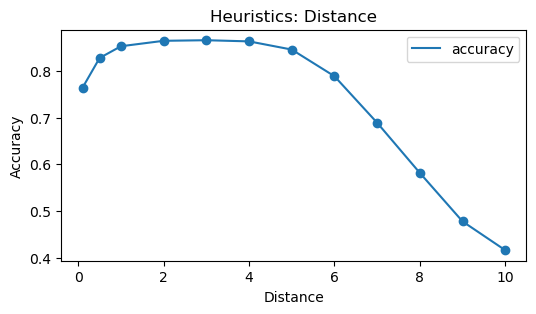

In [24]:
metrics=[0.1,0.5,1,2,3,4,5,6,7,8,9,10]
accuracy=[]
for m in metrics:
    pred=np.array(train['euc_dist'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy)
plt.title('Heuristics: Distance')
plt.ylabel('Accuracy')
plt.xlabel('Distance')
plt.legend()
pass    

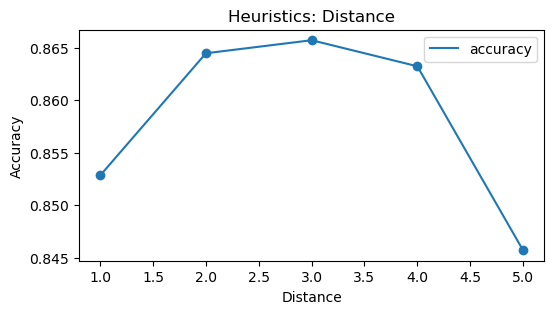

In [25]:
metrics=[1,2,3,4,5]
accuracy=[]
for m in metrics:
    pred=np.array(train['euc_dist'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy)
plt.title('Heuristics: Distance')
plt.ylabel('Accuracy')
plt.xlabel('Distance')
plt.legend()
pass    

In [26]:
distances=[1,2,3,4,5]
positive=train.filter(lambda x: x['label']==1)
negative=train.filter(lambda x: x['label']==0)
for d in distances:
    positive_metric=positive.filter(lambda x: x['euc_dist']>=d)
    negative_metric=negative.filter(lambda x: x['euc_dist']<d)
    print('----------------------------------------')
    print(f'Distance: {d}...')
    print(f'Total Samples: {len(positive_metric)+len(negative_metric)}')
    print(f'Positive Proportion: {len(positive_metric)/len(positive)}')
    print(f'Negative Proportion: {len(negative_metric)/len(negative)}')

----------------------------------------
Distance: 1...
Total Samples: 5494
Positive Proportion: 0.9986709197235513
Negative Proportion: 0.6481343283582089
----------------------------------------
Distance: 2...
Total Samples: 5569
Positive Proportion: 0.9970760233918129
Negative Proportion: 0.6783582089552239
----------------------------------------
Distance: 3...
Total Samples: 5577
Positive Proportion: 0.9920255183413078
Negative Proportion: 0.6884328358208955
----------------------------------------
Distance: 4...
Total Samples: 5561
Positive Proportion: 0.981658692185008
Negative Proportion: 0.6970149253731344
----------------------------------------
Distance: 5...
Total Samples: 5448
Positive Proportion: 0.9444444444444444
Negative Proportion: 0.707089552238806


--------

### Area

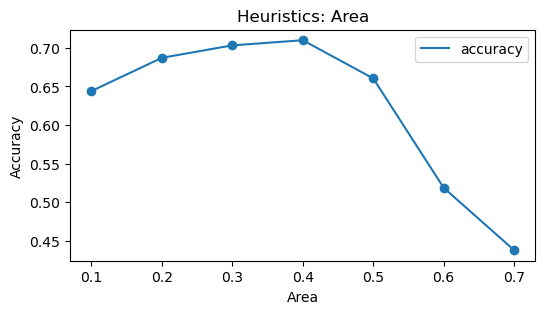

In [34]:
metrics=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
accuracy=[]
for m in metrics:
    pred=np.array(train['max_area'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy)
plt.title('Heuristics: Area')
plt.ylabel('Accuracy')
plt.xlabel('Area')
plt.legend()
pass    

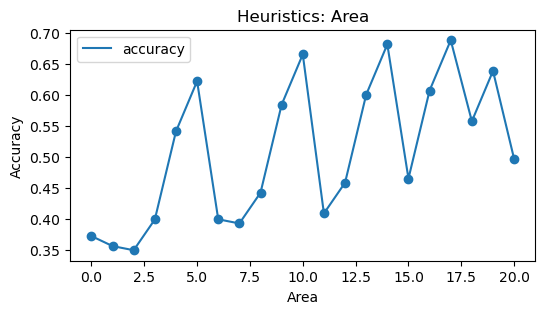

In [19]:
metrics=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
combs=list(product(metrics, metrics))
combs=[(lower, upper) for lower, upper in combs if upper>lower]
accuracy=[]
for lower,upper in combs:
    pred=( (np.array(train['max_area'])>=lower) & (np.array(train['max_area'])<upper) )
    accuracy.append(accuracy_score(train_gt, pred))    
plt.figure(figsize=(6,3))
plt.plot(range(len(combs)),accuracy,label='accuracy')
plt.scatter(range(len(combs)), accuracy)
plt.title('Heuristics: Area')
plt.ylabel('Accuracy')
plt.xlabel('Area')
plt.legend()
pass    

# Appendix

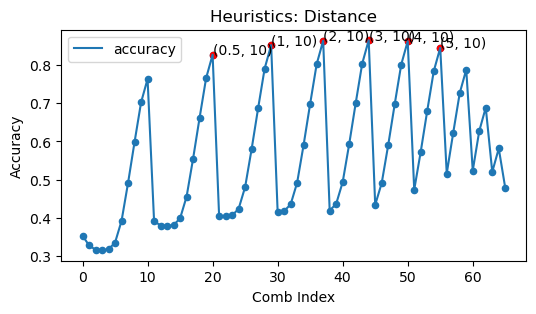

In [108]:
## final combs: {[1,10],[2,10],[3,10],[4,10],[5,10]}
metrics=[0.1,0.5,1,2,3,4,5,6,7,8,9,10]
combs=list(product(metrics, metrics))
combs=[(lower, upper) for lower, upper in combs if upper>lower]
accuracy=[]
for lower,upper in combs:
    pred=( (np.array(train['euc_dist'])>=lower) & (np.array(train['euc_dist'])<upper) )
    accuracy.append(accuracy_score(train_gt, pred))
top_index=np.where(np.array(accuracy)>=0.81)[0]
plt.figure(figsize=(6,3))
plt.plot(range(len(combs)),accuracy,label='accuracy')
plt.scatter(range(len(combs)), accuracy,s=20)
for i in top_index:
    plt.scatter(i,accuracy[i],color='red',s=20)
    plt.text(x=i,y=accuracy[i],s=combs[i])
plt.title('Heuristics: Distance')
plt.ylabel('Accuracy')
plt.xlabel('Comb Index')
plt.legend()
pass    

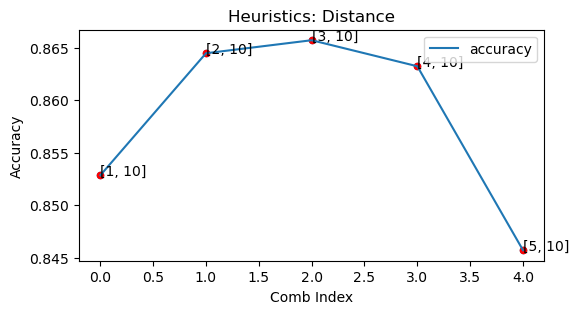

In [109]:
## final combs: {[1,10],[2,10],[3,10],[4,10],[5,10]}
combs=[[1,10],[2,10],[3,10],[4,10],[5,10]]
accuracy=[]
for lower,upper in combs:
    pred=( (np.array(train['euc_dist'])>=lower) & (np.array(train['euc_dist'])<upper) )
    accuracy.append(accuracy_score(train_gt, pred))
top_index=np.where(np.array(accuracy)>=0.81)[0]
plt.figure(figsize=(6,3))
plt.plot(range(len(combs)),accuracy,label='accuracy')
plt.scatter(range(len(combs)), accuracy,s=20)
for i in top_index:
    plt.scatter(i,accuracy[i],color='red',s=20)
    plt.text(x=i,y=accuracy[i],s=combs[i])
plt.title('Heuristics: Distance')
plt.ylabel('Accuracy')
plt.xlabel('Comb Index')
plt.legend()
pass    

In [110]:
accuracy

[0.8528407326917107,
 0.8644830797888854,
 0.8657249301459174,
 0.8632412294318534,
 0.8457000931387768]

In [90]:
name='euc_dist'
data=negative
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 0.24851339554016014
Mean: 2.69014482079829
Max: 9.976050532198926
STD: 3.785788089337008


In [93]:
combs=[[1,10],[2,10],[3,10],[4,10],[5,10]]
positive=train.filter(lambda x: x['label']==1)
negative=train.filter(lambda x: x['label']==0)
for lower,upper in combs:
    positive_metric=positive.filter(lambda x: (x['euc_dist']>=lower) & (x['min_angle']<upper) )
    negative_metric=negative.filter(lambda x: (x['euc_dist']<lower) & (x['min_angle']>=upper) )
    print('----------------------------------------')
    print(f'Combs: ({lower},{upper})...')
    print(f'Total Samples: {len(positive_metric)+len(negative_metric)}')
    print(f'Positive Proportion: {len(positive_metric)/len(positive)}')
    print(f'Negative Proportion: {len(negative_metric)/len(negative)}')

----------------------------------------
Combs: (1,10)...
Total Samples: 5392
Positive Proportion: 0.9909622541201488
Negative Proportion: 0.6208955223880597
----------------------------------------
Combs: (2,10)...
Total Samples: 5466
Positive Proportion: 0.9893673577884105
Negative Proportion: 0.6507462686567164
----------------------------------------
Combs: (3,10)...
Total Samples: 5471
Positive Proportion: 0.9843168527379054
Negative Proportion: 0.6597014925373135
----------------------------------------
Combs: (4,10)...
Total Samples: 5453
Positive Proportion: 0.9739500265816056
Negative Proportion: 0.6675373134328358
----------------------------------------
Combs: (5,10)...
Total Samples: 5334
Positive Proportion: 0.9370015948963317
Negative Proportion: 0.675
